In [42]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

current_dir = os.getcwd()

In [43]:
df = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'Climate_Data_with_FIPS.csv'), dtype={'FIPS': str})

df.head()

,FIPS,Year,avg_temp,max_temp,min_temp,total_precip,avg_pdsi
0,01001,1970,62.666667,92.1,28.1,50.06,-0.253333
1,01001,1971,63.241667,90.1,33.8,64.32,1.790833
2,01001,1972,63.708333,91.0,37.6,57.44,1.745833
3,01001,1973,63.583333,90.7,32.8,60.80,0.802500
4,01001,1974,63.808333,90.3,35.4,59.63,0.894167


In [44]:
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})

counties.sort_values(by='FIPS', inplace= True, ignore_index= True)

counties.head(5)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,FIPS,NAME,LSAD,ALAND,AWATER,id,geometry
0,01,001,00161526,0500000US01001,01001,Autauga,06,1.539602e+09,2.570696e+07,17,"POLYGON ((1225653.570 -1275799.515, 1225716.66..."
1,01,003,00161527,0500000US01003,01003,Baldwin,06,4.117547e+09,1.133056e+09,2759,"POLYGON ((1155289.138 -1558068.107, 1155680.98..."
2,01,005,00161528,0500000US01005,01005,Barbour,06,2.292145e+09,5.053870e+07,18,"POLYGON ((1351138.054 -1372080.257, 1351386.00..."
3,01,007,00161529,0500000US01007,01007,Bibb,06,1.612167e+09,9.602089e+06,2340,"POLYGON ((1174171.785 -1244842.057, 1183696.24..."
4,01,009,00161530,0500000US01009,01009,Blount,06,1.670104e+09,1.501542e+07,1021,"POLYGON ((1203691.393 -1144458.820, 1204032.64..."


In [45]:
counties["FIPS"] = counties["FIPS"].astype(str)
df["FIPS"] = df["FIPS"].astype(str)

In [46]:
def plot_yearly_data(year):
    # Filter for the specific year
    df_year = df[df['Year'] == year]
    
    # Merge the filtered DataFrame with the counties GeoDataFrame
    merged = counties.merge(df_year, how="outer", on="FIPS")
    
    # Plot the data
    column_to_plot = 'avg_temp'
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    merged.plot(column=column_to_plot, cmap='viridis', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True)
    plt.title(f'US County Average Temperature in {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

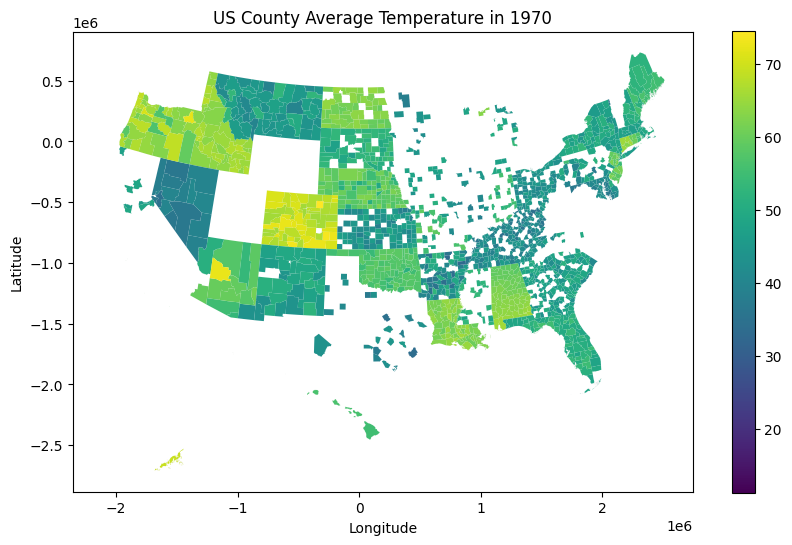

In [47]:
plot_yearly_data(1970)

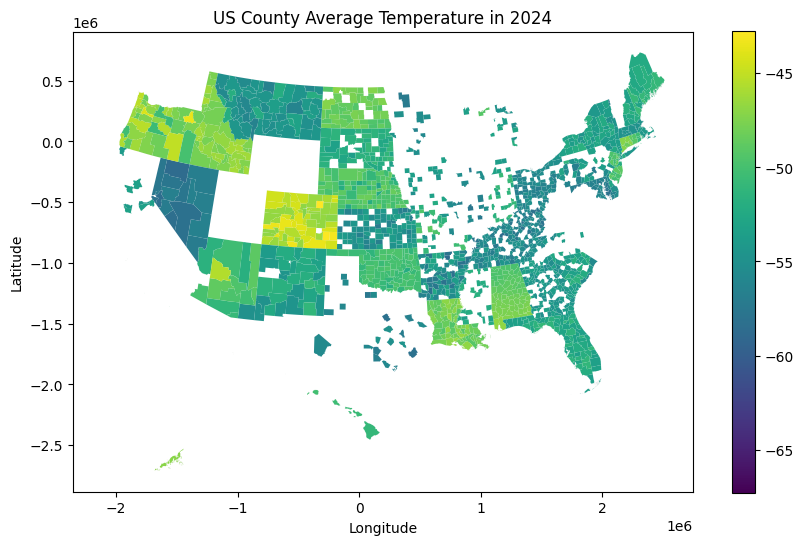

In [50]:
plot_yearly_data(2024)